/var/folders/mj/d586gltx7sl6tnrns06l047m0000gn/T/ipykernel_75891/3825411131.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


       no_of_rounds       B_draw  B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  \
count   4896.000000  4896.000000           4896.000000        4896.000000   
mean       3.181985     0.010621             26.308875           0.444001   
std        0.571515     0.108333             18.842430           0.111482   
min        3.000000     0.000000              0.000000           0.000000   
25%        3.000000     0.000000             10.940000           0.400000   
50%        3.000000     0.000000             26.310000           0.440000   
75%        3.000000     0.000000             35.130000           0.500000   
max        5.000000     2.000000            154.000000           1.000000   

       B_avg_SUB_ATT  B_avg_TD_landed  B_avg_TD_pct     B_losses  \
count    4896.000000      4896.000000   4896.000000  4896.000000   
mean        0.503779         1.250942      0.312057     1.726511   
std         0.619661         1.218504      0.226958     2.080347   
min         0.000000         0.000

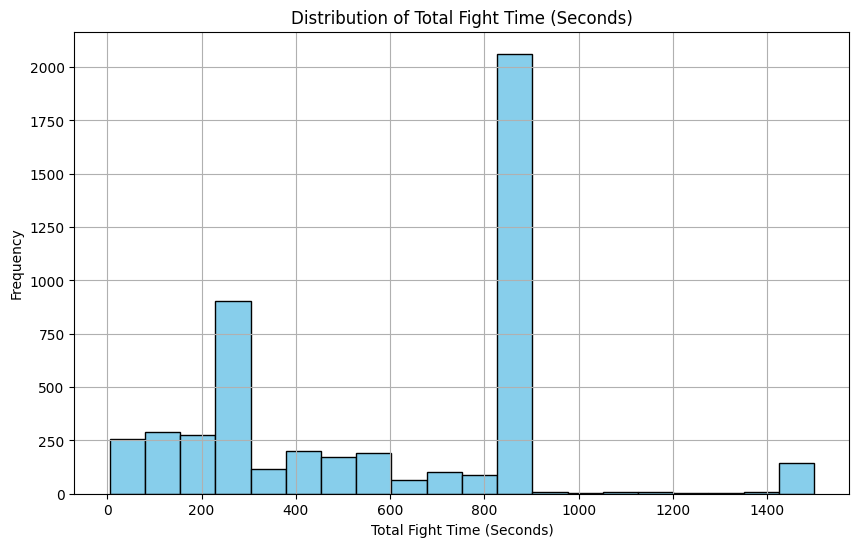

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Read the cleaned data
cleaned_ufc_data = pd.read_csv('fight_data_cleaned.csv')

# Statistical analysis
summary_stats = cleaned_ufc_data.describe()
print(summary_stats)

# Histogram of 'total_fight_time_secs'
plt.figure(figsize=(10, 6))
plt.hist(cleaned_ufc_data['total_fight_time_secs'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Fight Time (Seconds)')
plt.xlabel('Total Fight Time (Seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

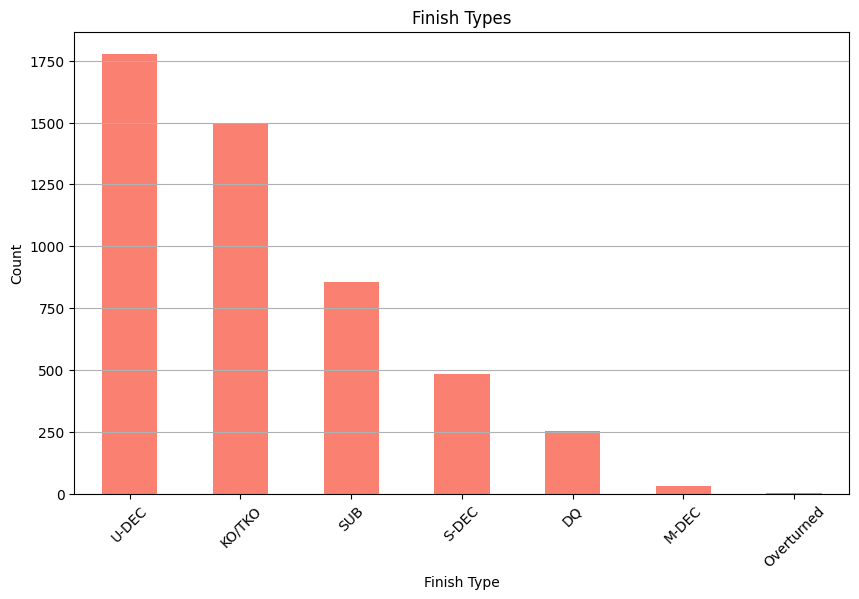

In [2]:
# Bar plot of finish types
finish_counts = cleaned_ufc_data['finish'].value_counts()
plt.figure(figsize=(10, 6))
finish_counts.plot(kind='bar', color='salmon')
plt.title('Finish Types')
plt.xlabel('Finish Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

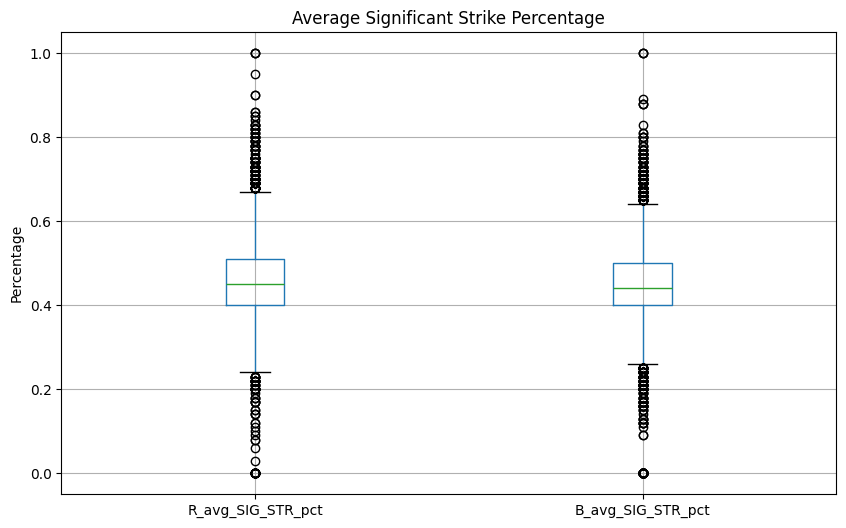

In [3]:
# Box plot of 'R_avg_SIG_STR_pct' and 'B_avg_SIG_STR_pct'
plt.figure(figsize=(10, 6))
cleaned_ufc_data[['R_avg_SIG_STR_pct', 'B_avg_SIG_STR_pct']].boxplot()
plt.title('Average Significant Strike Percentage')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

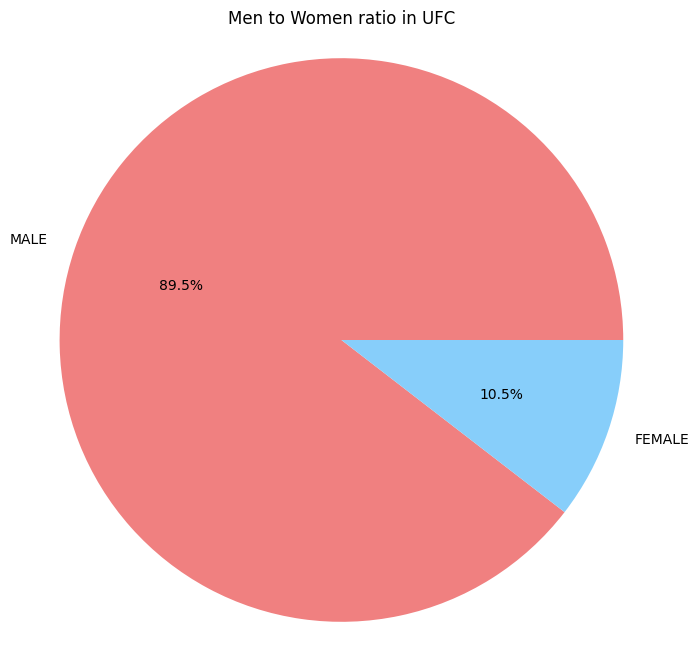

In [4]:
# Men to Women ratio in UFC
gender_counts = cleaned_ufc_data['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Men to Women ratio in UFC')
plt.axis('equal')
plt.show()

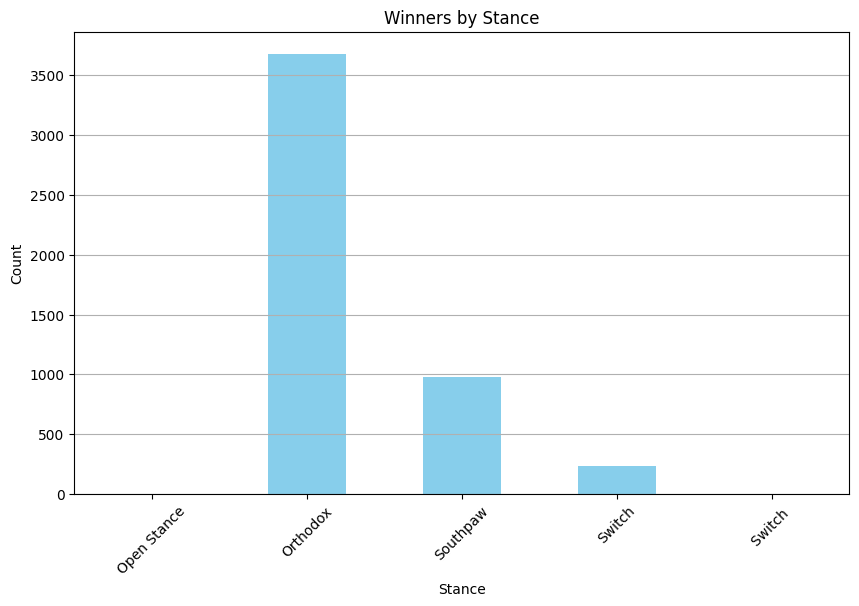

In [5]:
# Bar chart of winners by stance
stance_counts = cleaned_ufc_data['Winner'].groupby(cleaned_ufc_data['B_Stance']).count()
stance_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Winners by Stance')
plt.xlabel('Stance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


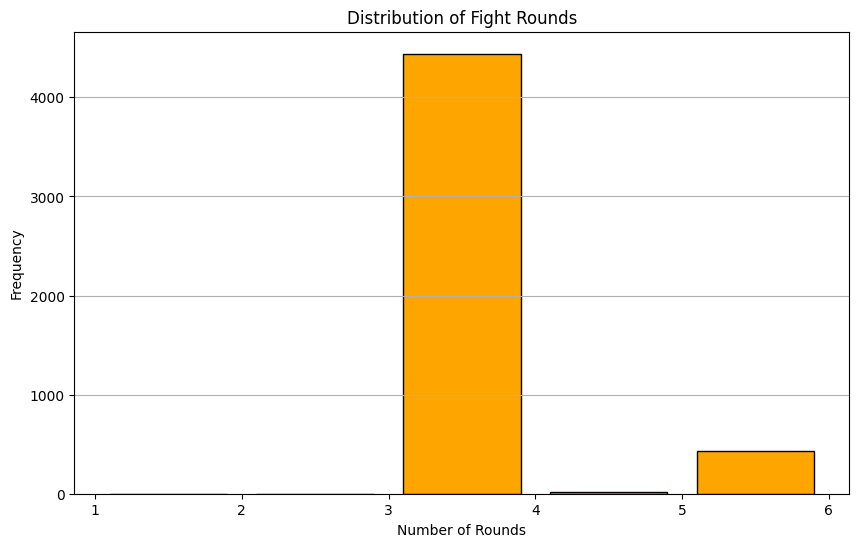

In [6]:
# Histogram of number of rounds
plt.figure(figsize=(10, 6))
plt.hist(cleaned_ufc_data['no_of_rounds'], bins=range(1, 7), rwidth=0.8, color='orange', edgecolor='black')
plt.title('Distribution of Fight Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.grid(axis='y')
plt.show()


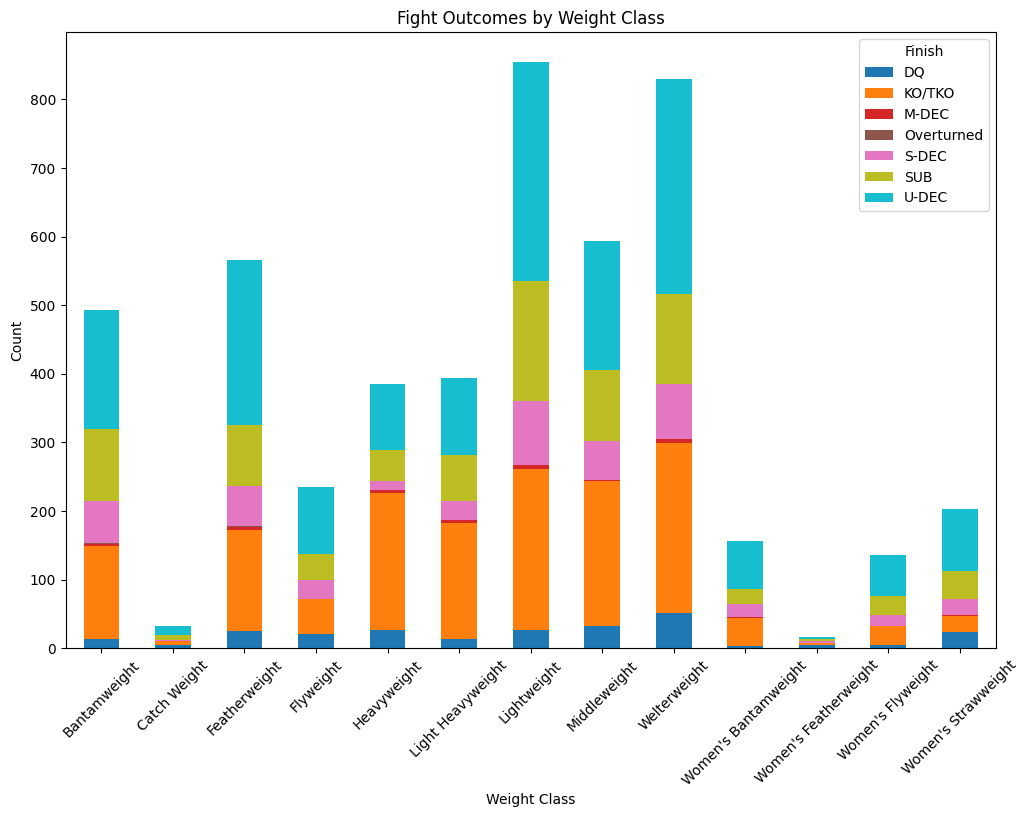

In [7]:
# Stacked bar chart of fight outcomes by weight class
fight_outcomes_by_weight_class = cleaned_ufc_data.groupby(['weight_class', 'finish']).size().unstack()
fight_outcomes_by_weight_class.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')
plt.title('Fight Outcomes by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Finish')
plt.show()


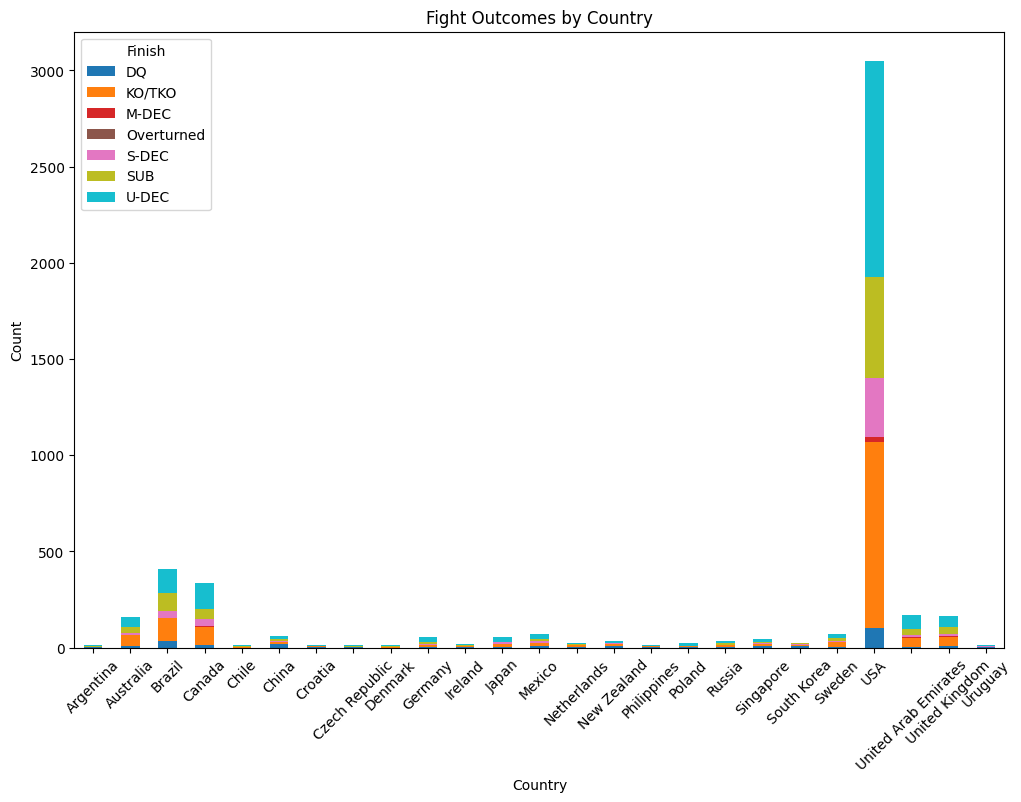

In [8]:
# Stacked bar chart of fight outcomes by country
fight_outcomes_by_country = cleaned_ufc_data.groupby(['country', 'finish']).size().unstack()
fight_outcomes_by_country.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')
plt.title('Fight Outcomes by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Finish')
plt.show()


/var/folders/mj/d586gltx7sl6tnrns06l047m0000gn/T/ipykernel_75891/977971621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y='B_avg_SIG_STR_landed', data=cleaned_ufc_data, palette='Set2')


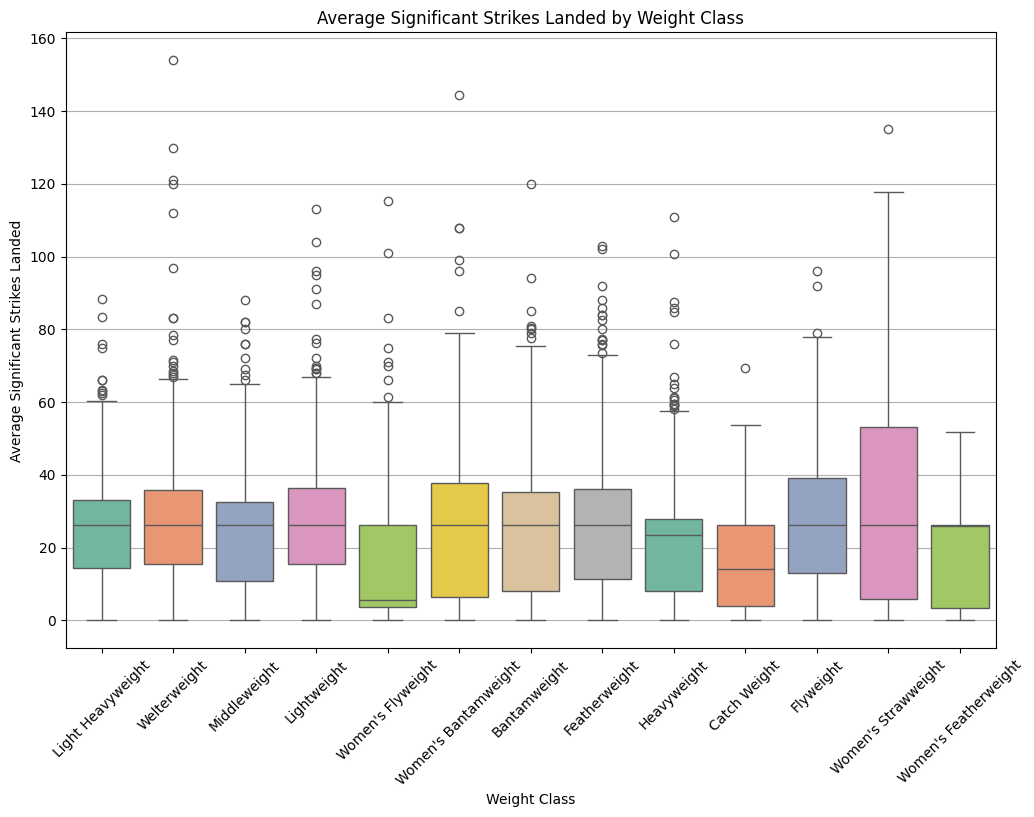

In [9]:
# Box plot of average significant strikes landed by weight class
plt.figure(figsize=(12, 8))
sns.boxplot(x='weight_class', y='B_avg_SIG_STR_landed', data=cleaned_ufc_data, palette='Set2')
plt.title('Average Significant Strikes Landed by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Average Significant Strikes Landed')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


/var/folders/mj/d586gltx7sl6tnrns06l047m0000gn/T/ipykernel_75891/2040484295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='R_age', data=cleaned_ufc_data, palette='pastel')


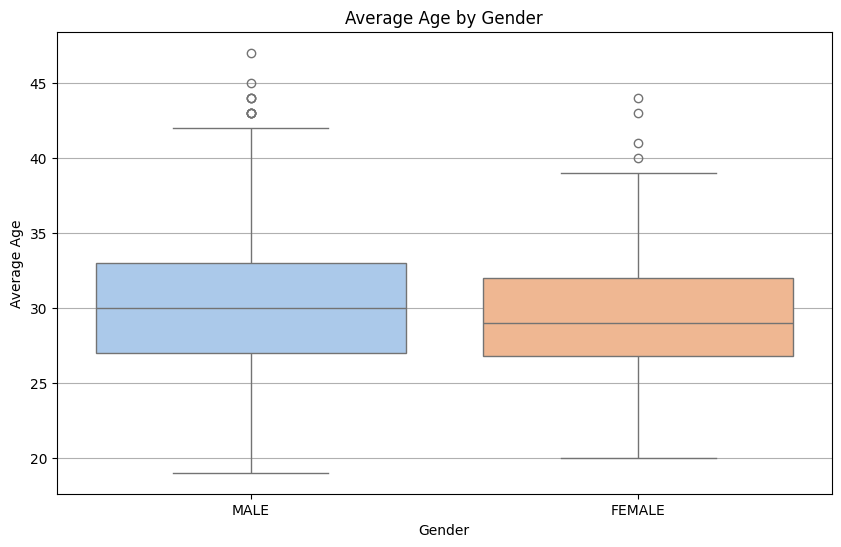

In [10]:
# Box plot of average age by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='R_age', data=cleaned_ufc_data, palette='pastel')
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.grid(axis='y')
plt.show()


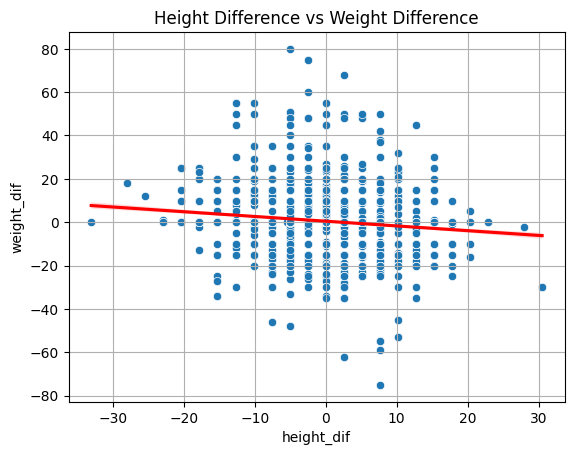

Correlation Coefficient (r value): -0.1475214167985493


In [15]:
# height vs weight diff

# Filter out outliers
cleaned_ufc_data_filtered = cleaned_ufc_data[np.abs(cleaned_ufc_data['height_dif']) <= 100]

# Extracting relevant columns
height_difference = cleaned_ufc_data_filtered['height_dif']  # Height difference between red and blue fighters
weight_difference = cleaned_ufc_data_filtered['weight_dif']  # Weight difference between red and blue fighters

# Plotting
sns.scatterplot(x=height_difference, y=weight_difference)
plt.title('Height Difference vs Weight Difference')
plt.xlabel('Height Difference (cms)')
plt.ylabel('Weight Difference (lbs)')

# Adding regression line
sns.regplot(x=height_difference, y=weight_difference, scatter=False, color='red')

plt.grid(True)
plt.show()

# correlation coefficient (r value)
correlation_matrix = cleaned_ufc_data_filtered[['height_dif', 'weight_dif']].corr()
r_value = correlation_matrix.loc['height_dif', 'weight_dif']

print("Correlation Coefficient (r value):", r_value)


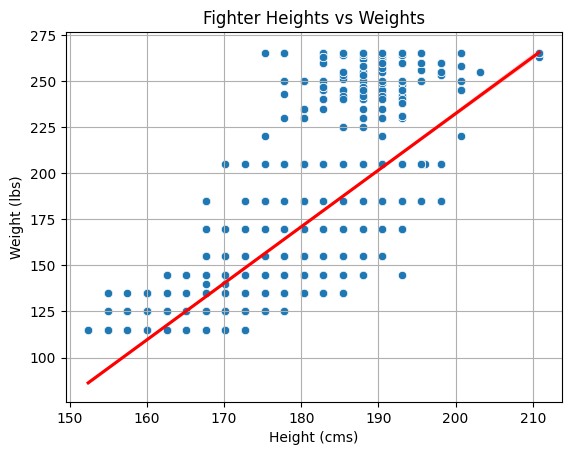

Correlation Coefficient (r value): 0.8003969382565564


In [12]:
# Combine heights and weights of both red and blue fighters
all_heights = pd.concat([cleaned_ufc_data_filtered['R_Height_cms'], cleaned_ufc_data_filtered['B_Height_cms']])
all_weights = pd.concat([cleaned_ufc_data_filtered['R_Weight_lbs'], cleaned_ufc_data_filtered['B_Weight_lbs']])

# Adding regression line
sns.regplot(x=all_heights, y=all_weights, scatter=False, color='red')

# Plotting
sns.scatterplot(x=all_heights, y=all_weights)
plt.title('Fighter Heights vs Weights')
plt.xlabel('Height (cms)')
plt.ylabel('Weight (lbs)')

plt.grid(True)
plt.show()

#correlation coefficient (r value)
correlation_matrix = cleaned_ufc_data_filtered[['R_Height_cms', 'R_Weight_lbs', 'B_Height_cms', 'B_Weight_lbs']].corr()
r_value = correlation_matrix.loc['R_Height_cms', 'R_Weight_lbs'] 

print("Correlation Coefficient (r value):", r_value)

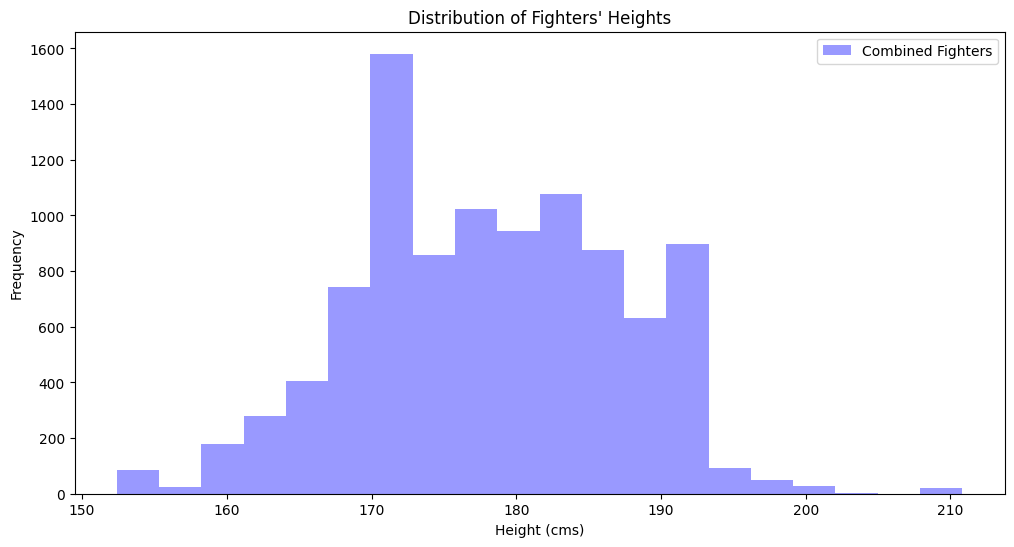

In [13]:
# Distribution of fighters' heights and reaches
plt.figure(figsize=(12, 6))
plt.hist(all_heights, bins=20, color='blue', alpha=0.4, label='Combined Fighters')
plt.xlabel('Height (cms)')
plt.ylabel('Frequency')
plt.title('Distribution of Fighters\' Heights')
plt.legend()
plt.show()

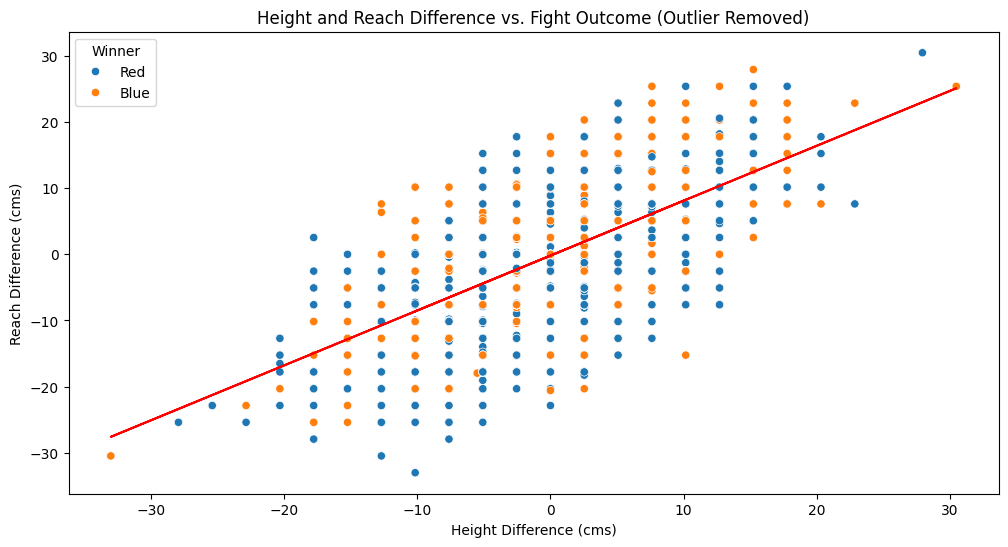

Correlation coefficient (r): 0.6397980988133115


In [17]:
# Height vs reach diff vs fight outcome
# Filter out the outlier
cleaned_ufc_data_filtered2 = cleaned_ufc_data[cleaned_ufc_data['reach_dif'] > -150]

# Plot the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_ufc_data_filtered2, x='height_dif', y='reach_dif', hue='Winner')

# Calculate and plot the best fit line
slope, intercept = np.polyfit(cleaned_ufc_data_filtered2['height_dif'], cleaned_ufc_data_filtered2['reach_dif'], 1)
plt.plot(cleaned_ufc_data_filtered2['height_dif'], slope * cleaned_ufc_data_filtered2['height_dif'] + intercept, color='red')

plt.xlabel('Height Difference (cms)')
plt.ylabel('Reach Difference (cms)')
plt.title('Height and Reach Difference vs. Fight Outcome ')
plt.legend(title='Winner')
plt.show()

# Calculate the correlation coefficient (r)
r = np.corrcoef(cleaned_ufc_data_filtered2['height_dif'], cleaned_ufc_data_filtered2['reach_dif'])[0, 1]
print("Correlation coefficient (r):", r)